# Automobile Price Prediction

In [399]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [400]:
#assigning column names
columns=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location',
    'wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
    'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [401]:
data=pd.read_csv("imports-85.csv",names=columns)

In [402]:
pd.set_option('display.max_columns',100)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The NULL values in this dataset are represented by '?'. Hence, replacing them with 'np.nan'.

In [403]:
#replace '?' with NaN
data.replace(to_replace='?',value=np.nan,inplace=True)

Checking for Null values.

In [404]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Null values are found. Hence, filling them suitably.

In [405]:
#filling null values
data['normalized-losses']=data['normalized-losses'].astype('float')
data['normalized-losses']=data['normalized-losses'].fillna(data['normalized-losses'].mean())
data['num-of-doors']=data['num-of-doors'].fillna(data['num-of-doors'].mode()[0])
data['bore']=data['bore'].astype('float')
data['bore']=data['bore'].fillna(data['bore'].mean())
data['stroke']=data['stroke'].astype('float')
data['stroke']=data['stroke'].fillna(data['stroke'].mean())
data['horsepower']=data['horsepower'].astype('float')
data['horsepower']=data['horsepower'].fillna(data['horsepower'].mean())
data['peak-rpm']=data['peak-rpm'].fillna(data['peak-rpm'].mode()[0])
data['price']=data['price'].astype('float')
data['price']=data['price'].fillna(int(data['price'].mean()))

In [406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-

### Data Cleaning And Feature Engineering.

In [311]:
data.symboling=data.symboling.astype('str')
data.symboling.unique()

array(['3', '1', '2', '0', '-1', '-2'], dtype=object)

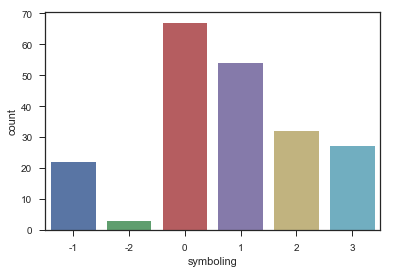

In [312]:
sb.countplot(data.symboling)

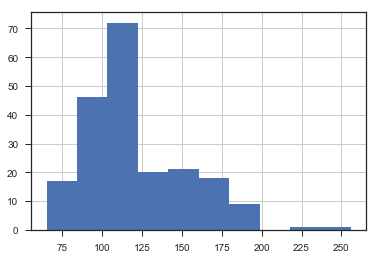

In [313]:
data['normalized-losses'].hist()

In [314]:
data.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

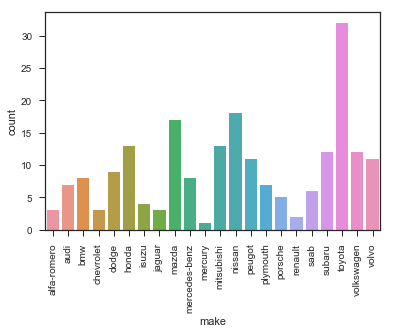

In [315]:
sb.countplot(data.make)
plt.xticks(rotation=90)

In [316]:
data['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

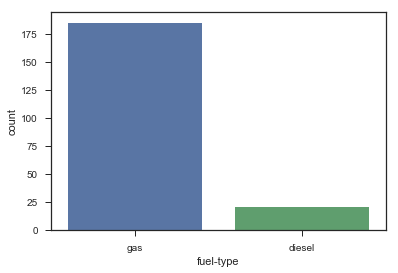

In [317]:
sb.countplot(data['fuel-type'])

In [318]:
data.aspiration.unique()

array(['std', 'turbo'], dtype=object)

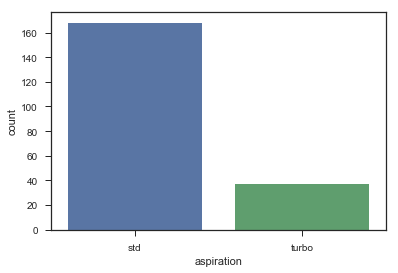

In [319]:
sb.countplot(data.aspiration)

In [320]:
data['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

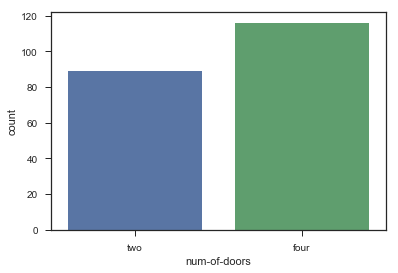

In [321]:
sb.countplot(data['num-of-doors'])

In [322]:
data['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

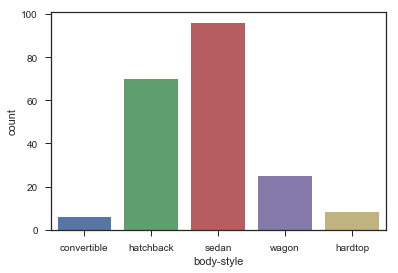

In [323]:
sb.countplot(data['body-style'])

In [324]:
data['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Since, 'fwd' and '4wd' have the same meaning, so, making them one.

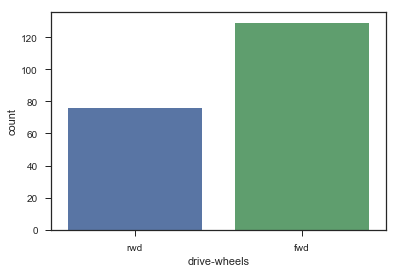

In [325]:
data['drive-wheels'].replace('4wd','fwd',inplace=True)
sb.countplot(data['drive-wheels'])

In [326]:
data['engine-location'].unique()

array(['front', 'rear'], dtype=object)

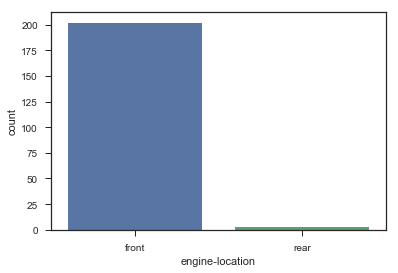

In [327]:
sb.countplot(data['engine-location'])
#unnecessary feature
data.drop('engine-location',axis=1,inplace=True)

The count of 'near' in the feature 'engine-location' in very less. Hence, dropping it.

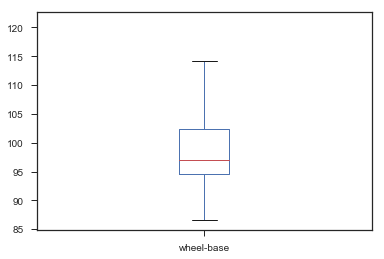

In [328]:
data['wheel-base'].plot(kind='box')

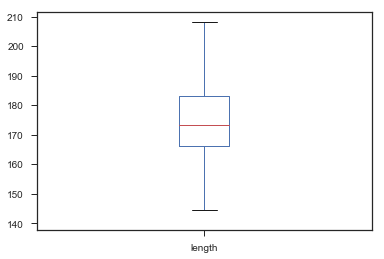

In [329]:
data.length.plot(kind='box')

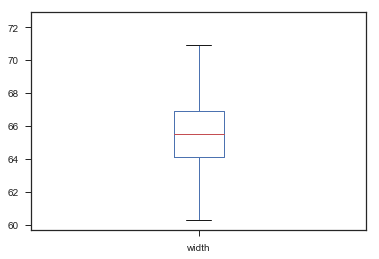

In [330]:
data.width.plot(kind='box')

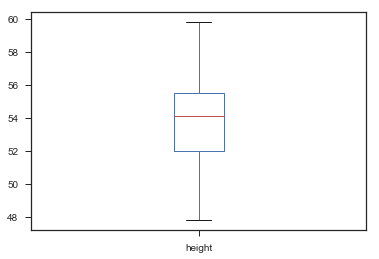

In [331]:
data.height.plot(kind='box')

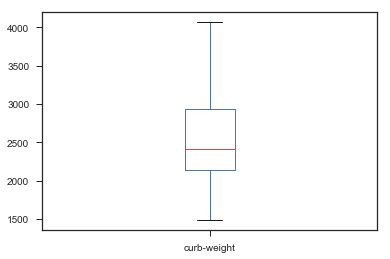

In [332]:
data['curb-weight'].plot(kind='box')

In [333]:
data['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

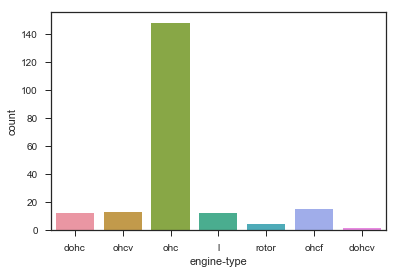

In [334]:
sb.countplot(data['engine-type'])

In [335]:
data['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

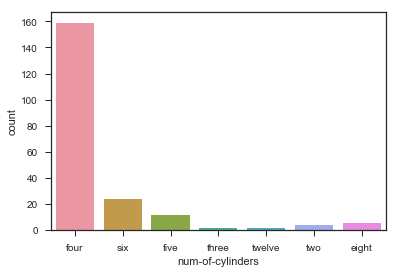

In [336]:
sb.countplot(data['num-of-cylinders'])

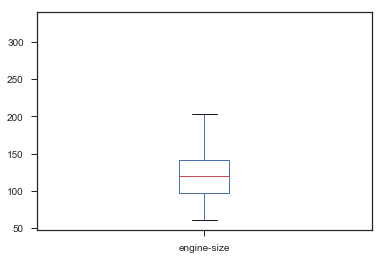

In [337]:
data['engine-size'].plot(kind='box')

In [338]:
data['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

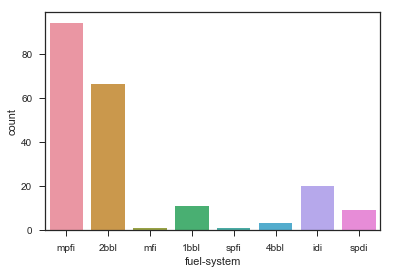

In [339]:
sb.countplot(data['fuel-system'])

In [340]:
data.bore=data.bore.astype(float)

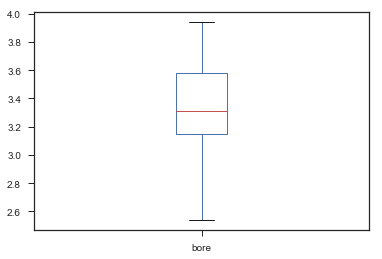

In [341]:
data.bore.plot(kind='box')

In [342]:
data.stroke=data.stroke.astype(float)

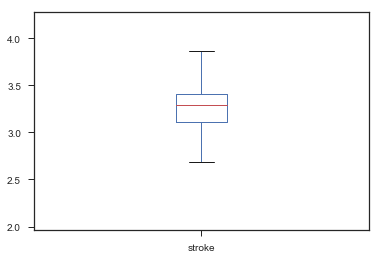

In [343]:
data.stroke.plot(kind='box')

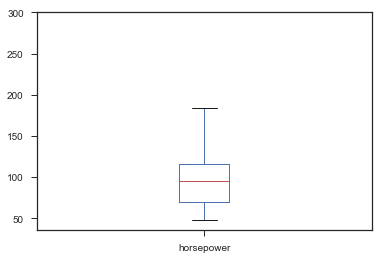

In [344]:
data.horsepower.plot(kind='box')

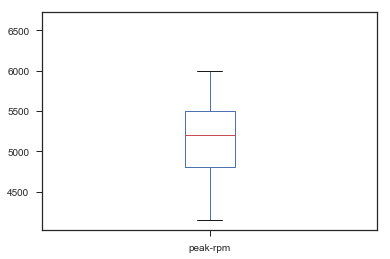

In [345]:
data['peak-rpm']=data['peak-rpm'].astype('float')
data['peak-rpm'].plot(kind='box')

In [346]:
data=data[data['peak-rpm']<6500]

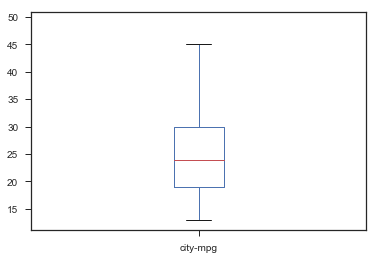

In [347]:
data['city-mpg'].plot(kind='box')

In [348]:
data['highway-mpg'].unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46], dtype=int64)

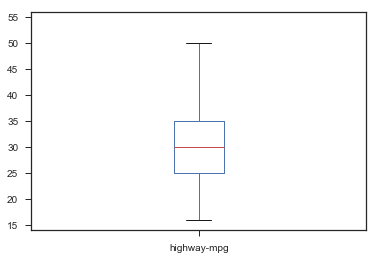

In [349]:
data['highway-mpg'].plot(kind='box')

### Checking for Correlation

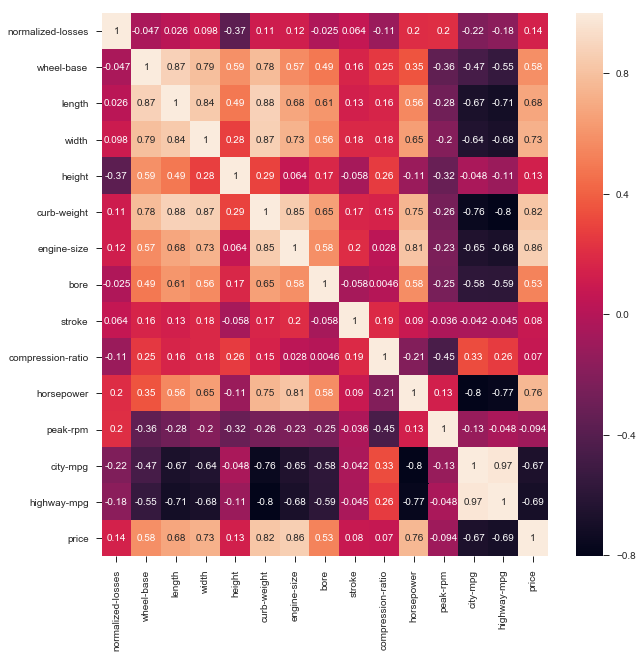

In [350]:
plt.figure(figsize=(10,10))
sb.heatmap(data.corr(),annot=True)

In [351]:
#wheel-base and length
#length and width
#length and curb-weight
#width and curb-weight
#curb-weight and engine-size
#city-mpg and highway-mpg
#all of the above are highly correlated.
#Hence, dropping length,width,engine-size and city-mpg.

data.drop('length',axis=1,inplace=True)
data.drop('width',axis=1,inplace=True)
data.drop('engine-size',axis=1,inplace=True)
data.drop('city-mpg',axis=1,inplace=True)

In [352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 21 columns):
symboling            203 non-null object
normalized-losses    203 non-null float64
make                 203 non-null object
fuel-type            203 non-null object
aspiration           203 non-null object
num-of-doors         203 non-null object
body-style           203 non-null object
drive-wheels         203 non-null object
wheel-base           203 non-null float64
height               203 non-null float64
curb-weight          203 non-null int64
engine-type          203 non-null object
num-of-cylinders     203 non-null object
fuel-system          203 non-null object
bore                 203 non-null float64
stroke               203 non-null float64
compression-ratio    203 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
highway-mpg          203 non-null int64
price                203 non-null float64
dtypes: float64(9), int64(2

### Bivariate Analysis

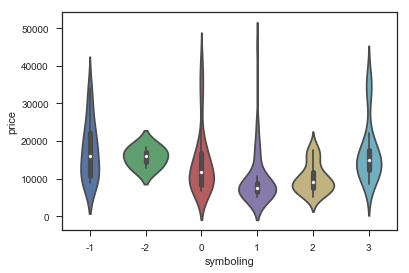

In [353]:
sb.violinplot(data.symboling,data.price)

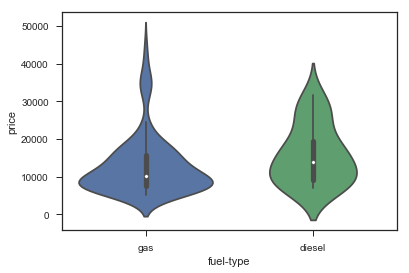

In [354]:
sb.violinplot(data['fuel-type'],data.price)

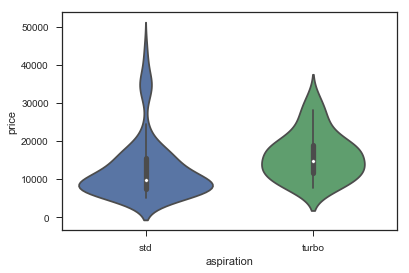

In [355]:
sb.violinplot(data['aspiration'],data.price)

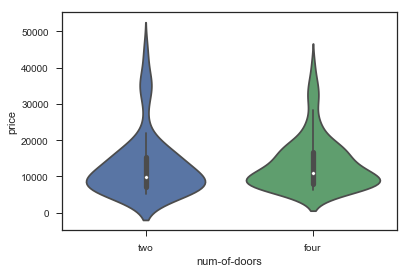

In [356]:
sb.violinplot(data['num-of-doors'],data.price)

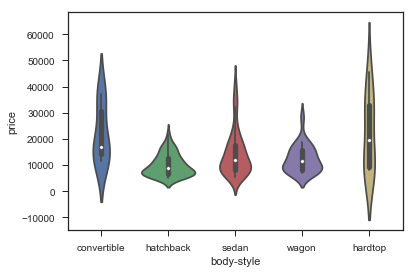

In [357]:
sb.violinplot(data['body-style'],data.price)

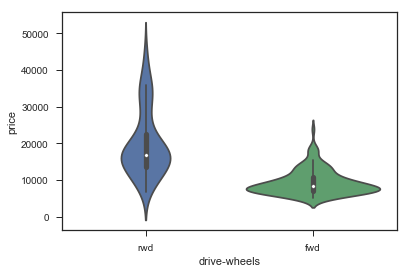

In [358]:
sb.violinplot(data['drive-wheels'],data.price)

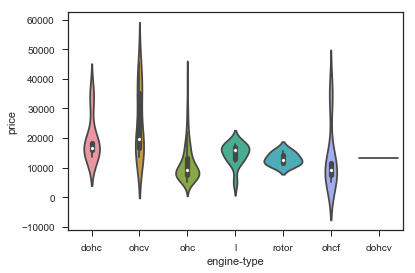

In [359]:
sb.violinplot(data['engine-type'],data.price)

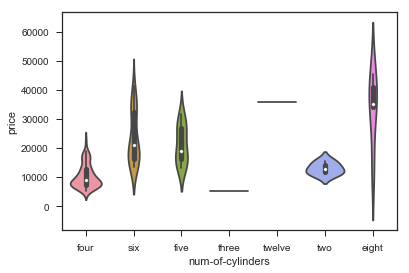

In [360]:
sb.violinplot(data['num-of-cylinders'],data.price)

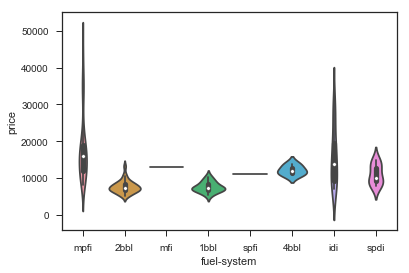

In [361]:
sb.violinplot(data['fuel-system'],data.price)

In [362]:
X=data.iloc[:,:21]
X.drop('price',axis=1,inplace=True)
Y=data.price

### Label Encoding

In [363]:
features=['symboling','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-type','num-of-cylinders'
         ,'fuel-system']

In [368]:
le=LabelEncoder()
for feature in features:
    X[feature]=le.fit_transform(X[feature])

### One-Hot Encoding

In [369]:
X=pd.get_dummies(X,columns=features)

### Train-Test Split

In [394]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.20,random_state=8)

### Building Model

In [395]:
linreg=LinearRegression()
linreg.fit(train_x,train_y)
print("Accuracy on train data:")
linreg.score(train_x,train_y)

Accuracy on train data:


0.9544660244756172

### Final Answer

In [396]:
print("Accuracy on test data:")
linreg.score(test_x,test_y)

Accuracy on test data:


0.9066179334404174

###### Hence, the accuracy of the model on training set is 95% and on test data is 91%.